# Farhan Pagarkar | Intern | Unified Mentor

### importing the required libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data and preprocessing it

In [27]:
df = pd.read_csv("index.csv")
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['weekday'] = df['date'].dt.day_name()  # Add day of the week
df['hour'] = df['datetime'].dt.hour       # Add hour of transaction

### 1. Time Series Exploratory Data Analysis (EDA)

###  Daily Sales Over Time:-

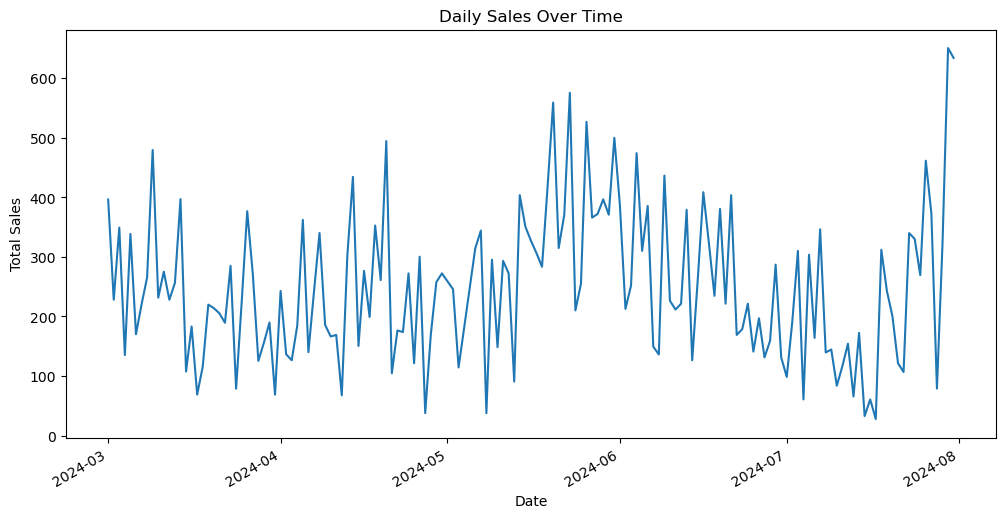

In [31]:
daily_sales = df.groupby('date')['money'].sum()
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

### Sales by Hour of Day:-

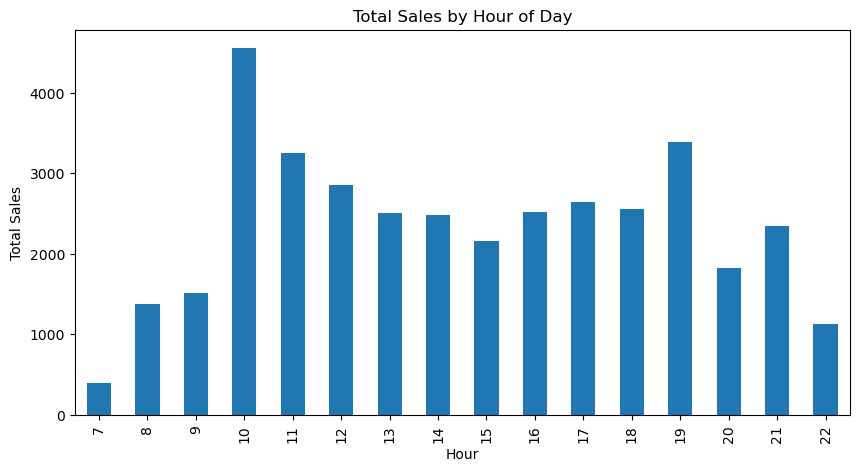

In [36]:
hourly_sales = df.groupby('hour')['money'].sum()
plt.figure(figsize=(10,5))
hourly_sales.plot(kind='bar')
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

### Sales Heatmap by Day and Hour

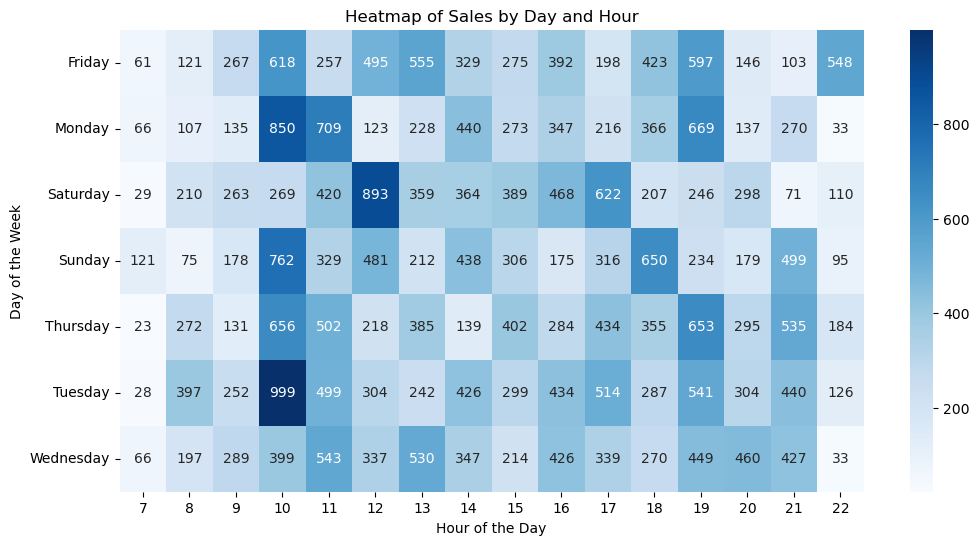

In [71]:
aggregated_data = df.groupby(['weekday', 'hour'])['money'].sum().reset_index()
reshaped_data = aggregated_data.pivot(index='weekday', columns='hour', values='money')
plt.figure(figsize=(12, 6))
sns.heatmap(reshaped_data, cmap='Blues', annot=True, fmt=".0f")
plt.title("Heatmap of Sales by Day and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


### 2. Coffee Type Analysis

### Analyze coffee types purchased

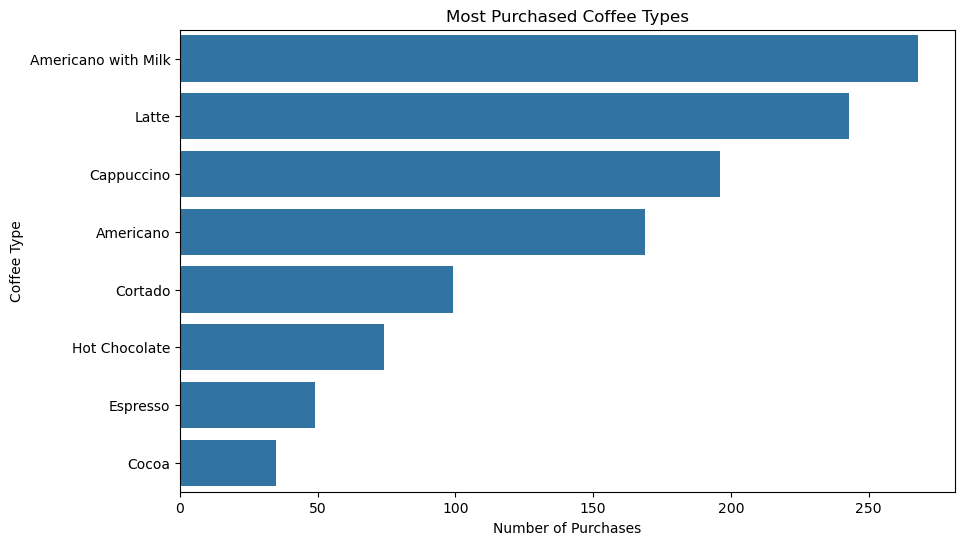

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title("Most Purchased Coffee Types")
plt.xlabel("Number of Purchases")
plt.ylabel("Coffee Type")
plt.show()